<a href="https://colab.research.google.com/github/ahvblackwelltech/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DSPT3_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself



In [0]:
# Imported needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loaded dataset via local drive
from google.colab import files
uploaded = files.upload()

Saving persons.csv to persons (1).csv


In [4]:
# Review data
df = pd.read_csv('persons.csv')
df

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [5]:
# Fixed the missing column name
df = df.rename(columns = {'Unnamed: 0': 'ID'})
print(df)

        ID  age  weight  exercise_time
0        0   44     118            192
1        1   41     161             35
2        2   46     128            220
3        3   39     216             57
4        4   28     116            182
5        5   58     103            165
6        6   55     161            107
7        7   21     188             37
8        8   55     216             79
9        9   50     127            267
10      10   21     160            228
11      11   43     102             78
12      12   73     209             44
13      13   27     165             48
14      14   21     169            171
15      15   36     131            194
16      16   49     171            191
17      17   69     172            147
18      18   18     122            271
19      19   55     157            111
20      20   19     218             28
21      21   34     143             24
22      22   20     116            267
23      23   20     159            241
24      24   32     117  

In [6]:
df = df.set_index('ID')
df.head()

,age,weight,exercise_time
ID,,,
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


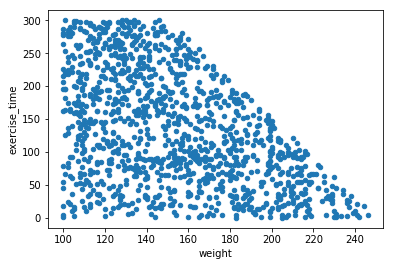

In [7]:
df.plot.scatter('weight', 'exercise_time')

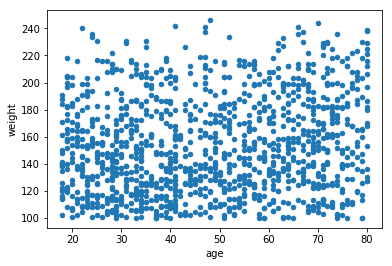

In [8]:
df.plot.scatter('age', 'weight')

In [1]:
!pip install pandas==0.24.0

     |████████████████████████████████| 10.1MB 4.2MB/s 
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


In [19]:
bmi_bins = pd.cut(df['age'],5)
pd.crosstab(df['weight'],5)

col_0,5
weight,
100,15
101,10
102,13
103,8
104,9
105,10
106,8
107,11
108,19


In [20]:
pd.crosstab(bmi_bins,[df['age'], df['weight']])

age     18                                  ...  80                                
weight 102 114 115 116 120 122 126 135 138  ... 197 206 212 216 221 225 229 238 239
age                                         ...                                    
18       1   1   1   1   1   1   1   1   2  ...   0   0   0   0   0   0   0   0   0
19       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
20       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
21       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
22       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
23       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
24       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
25       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
26       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
27       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
28       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
29       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
30       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
31       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
32       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
33       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
34       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
35       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
36       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
37       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
38       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
39       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
40       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
41       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
42       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
43       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
44       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
45       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
46       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
47       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
..      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
51       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
52       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
53       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
54       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
55       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
56       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
57       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
58       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
59       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
60       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
61       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
62       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
63       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
64       0   0   0   0   0   0   0   0   0  ...   0 

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. They are called discrete variables
2. The relationship between the two is real and spurious
3.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)